In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense , LSTM, Flatten ,TimeDistributed
from keras.layers.convolutional import Conv1D , MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import math


Using TensorFlow backend.


In [2]:
football_data=pd.read_csv("StrikerDataset.csv")
football_data[['ID','Name','Age','Nationality','Club','Preferred Foot','Position','Jersey Number','Height','Weight','ShortPassing','FKAccuracy','LongPassing','BallControl','Acceleration',
              'Agility','Balance','ShotPower','Jumping','Stamina','Strength','Vision','Penalties','StandingTackle','GKHandling','GKReflexes']]



,ID,Name,Age,Nationality,Club,Preferred Foot,Position,Jersey Number,Height,Weight,...,Balance,ShotPower,Jumping,Stamina,Strength,Vision,Penalties,StandingTackle,GKHandling,GKReflexes
0,158023,L. Messi,31,Argentina,FC Barcelona,Left,RF,10.0,5'7,159lbs,...,95.0,85.0,68.0,72.0,59.0,94.0,75.0,28.0,11.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,Juventus,Right,ST,7.0,6'2,183lbs,...,70.0,95.0,95.0,88.0,79.0,82.0,85.0,31.0,11.0,11.0
2,190871,Neymar Jr,26,Brazil,Paris Saint-Germain,Right,LW,10.0,5'9,150lbs,...,84.0,80.0,61.0,81.0,49.0,87.0,81.0,24.0,9.0,11.0
3,193080,De Gea,27,Spain,Manchester United,Right,GK,1.0,6'4,168lbs,...,43.0,31.0,67.0,43.0,64.0,68.0,40.0,21.0,85.0,94.0
4,192985,K. De Bruyne,27,Belgium,Manchester City,Right,RCM,7.0,5'11,154lbs,...,77.0,91.0,63.0,90.0,75.0,94.0,79.0,58.0,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,Crewe Alexandra,Right,CM,22.0,5'9,134lbs,...,76.0,43.0,55.0,40.0,47.0,52.0,43.0,48.0,13.0,9.0
18203,243165,N. Christoffersson,19,Sweden,Trelleborgs FF,Right,ST,21.0,6'3,170lbs,...,52.0,41.0,47.0,43.0,67.0,33.0,43.0,15.0,9.0,12.0
18204,241638,B. Worman,16,England,Cambridge United,Right,ST,33.0,5'8,148lbs,...,58.0,45.0,60.0,55.0,32.0,43.0,55.0,13.0,5.0,13.0
18205,246268,D. Walker-Rice,17,England,Tranmere Rovers,Right,RW,34.0,5'10,154lbs,...,71.0,64.0,42.0,40.0,48.0,47.0,50.0,25.0,6.0,9.0


In [3]:
football_data.dropna(inplace=True)

In [4]:
football_data.isnull().sum()

Unnamed: 0              0
ID                      0
Name                    0
Age                     0
Photo                   0
Nationality             0
Club                    0
Value                   0
Wage                    0
Preferred Foot          0
Position                0
Jersey Number           0
Joined                  0
Contract Valid Until    0
Height                  0
Weight                  0
ShortPassing            0
FKAccuracy              0
LongPassing             0
BallControl             0
Acceleration            0
SprintSpeed             0
Agility                 0
Reactions               0
Balance                 0
ShotPower               0
Jumping                 0
Stamina                 0
Strength                0
LongShots               0
Aggression              0
Interceptions           0
Vision                  0
Penalties               0
StandingTackle          0
GKHandling              0
GKReflexes              0
dtype: int64

In [5]:
football_data.drop("Photo",axis=1,inplace=True)

In [6]:
football_data.head(5)

,Unnamed: 0,ID,Name,Age,Nationality,Club,Value,Wage,Preferred Foot,Position,...,Stamina,Strength,LongShots,Aggression,Interceptions,Vision,Penalties,StandingTackle,GKHandling,GKReflexes
0,0,158023,L. Messi,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,...,72.0,59.0,94.0,48.0,22.0,94.0,75.0,28.0,11.0,8.0
1,1,20801,Cristiano Ronaldo,33,Portugal,Juventus,€77M,€405K,Right,ST,...,88.0,79.0,93.0,63.0,29.0,82.0,85.0,31.0,11.0,11.0
2,2,190871,Neymar Jr,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,...,81.0,49.0,82.0,56.0,36.0,87.0,81.0,24.0,9.0,11.0
3,3,193080,De Gea,27,Spain,Manchester United,€72M,€260K,Right,GK,...,43.0,64.0,12.0,38.0,30.0,68.0,40.0,21.0,85.0,94.0
4,4,192985,K. De Bruyne,27,Belgium,Manchester City,€102M,€355K,Right,RCM,...,90.0,75.0,91.0,76.0,61.0,94.0,79.0,58.0,13.0,13.0


In [7]:
# #Importing team formation algorithm.
# from team_formation import *

def scale_data_toLSTM(X ,Y):
    # load dataset
    X =  pd.DataFrame(X)
    Y = pd.DataFrame(Y)
    values = X.values

    # integer encode direction
    # encoder = LabelEncoder() #Label encoding (one-hot) for player position at column no.= 9
    # values[:,position_col] = encoder.fit_transform(values[:,position_col])

    # ensure all data is float
    values = values.astype('float32')
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_scaled = scaler.fit_transform(values)
    Y_scaled = scaler.fit_transform(Y.values)
    
    # reshape input to be 4D [samples, subsequences, timesteps, features] and target data to be [samples,]
    X_scaled = X_scaled.reshape(X_scaled.shape[0],1,1,X_scaled.shape[1])
    Y_scaled = Y_scaled.reshape((Y_scaled.shape[0],))
    
    return (X_scaled , Y_scaled, scaler)

In [15]:
#Split Training & Testing Set
data_refined = football_data.loc[:,[i for i in list(football_data.columns) if i not in ['ID', 'Name', 'Club', 'Nationality']]]
#one-hot encoding for player position
data_refined = pd.get_dummies(data_refined, columns = ['Position', 'Jersey Number'], drop_first=True)
X_train, X_test, Y_train, Y_test = train_test_split(data_refined.loc[:, data_refined.columns != 'Balance'], data_refined['Balance'], test_size=0.2, random_state=0)


test_X , test_y,scaler = scale_data_toLSTM(X_test, Y_test )
train_X , train_y,scaler = scale_data_toLSTM(X_train, Y_train)



In [9]:
football_data.drop("Wage",axis=1,inplace=True)

In [10]:
football_data.drop("Value",axis=1,inplace=True)

In [11]:
football_data.drop("Preferred Foot",axis=1,inplace=True)

In [12]:
football_data.drop("Joined",axis=1,inplace=True)

In [13]:
football_data.drop("Height",axis=1,inplace=True)

In [14]:
football_data.drop("Weight",axis=1,inplace=True)

In [18]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=10, kernel_size=1, activation='relu'), input_shape=(1, 1, 147)))
model.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(10))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()


NO_BATCH_SIZE = 100 
NO_EPOCHS = 30

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_4 (TimeDist (None, 1, 1, 10)          1480      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 1, 1, 10)          0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 1, 10)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 2,331
Trainable params: 2,331
Non-trainable params: 0
_________________________________________________________________


In [19]:
# fit model
history = model.fit(train_X, train_y, epochs=NO_EPOCHS, verbose=1, batch_size=NO_BATCH_SIZE,
                    validation_data=(test_X, test_y))

Train on 13323 samples, validate on 3331 samples
Epoch 1/30
13323/13323 [==============================] - 4s 290us/step - loss: 0.0840 - val_loss: 0.0215
Epoch 2/30
13323/13323 [==============================] - 0s 31us/step - loss: 0.0156 - val_loss: 0.0142
Epoch 3/30
13323/13323 [==============================] - 0s 30us/step - loss: 0.0118 - val_loss: 0.0122
Epoch 4/30
13323/13323 [==============================] - 0s 31us/step - loss: 0.0102 - val_loss: 0.0110
Epoch 5/30
13323/13323 [==============================] - 0s 31us/step - loss: 0.0095 - val_loss: 0.0106
Epoch 6/30
13323/13323 [==============================] - 0s 31us/step - loss: 0.0093 - val_loss: 0.0106
Epoch 7/30
13323/13323 [==============================] - 0s 30us/step - loss: 0.0092 - val_loss: 0.0106
Epoch 8/30
13323/13323 [==============================] - 0s 33us/step - loss: 0.0091 - val_loss: 0.0104
Epoch 9/30
13323/13323 [==============================] - 0s 33us/step - loss: 0.0091 - val_loss: 0.0103
Epoch

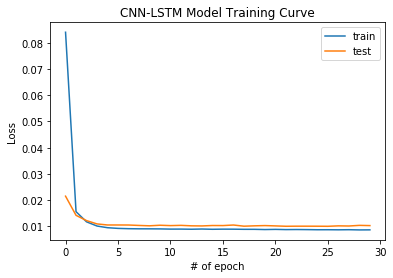

Test MSE: 66.191


In [22]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.xlabel('# of epoch')
pyplot.ylabel('Loss')
pyplot.title("CNN-LSTM Model Training Curve")
pyplot.show()

test_X , test_y,scaler = scale_data_toLSTM(X_test, Y_test )
train_X , train_y,scaler = scale_data_toLSTM(X_train, Y_train)


yhat = model.predict(test_X)
test_X = test_X.reshape(((test_X.shape[0],test_X.shape[3])))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mse = mean_squared_error(inv_y, inv_yhat)
print('Test MSE: %.3f' % mse)